<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/dtplay.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [2]:


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['outlook', 'temp', 'humidity', 'windy','play']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)




# Print head
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [3]:
x=df.drop("play",axis=1)
y=df['play']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

[[0 1]
 [1 1]]


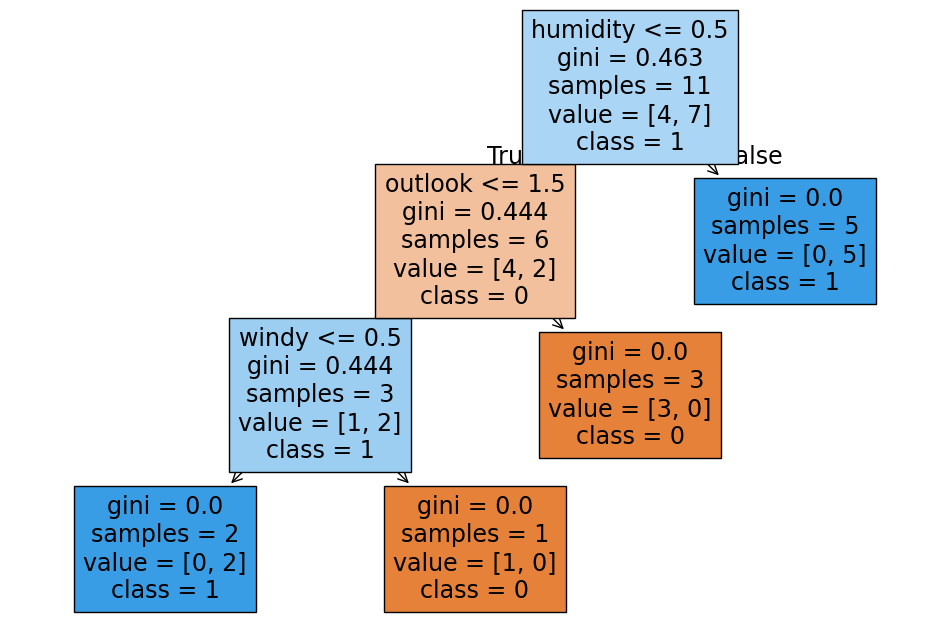

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=x.columns, class_names=['0', '1'], filled=True)
plt.show()